In [153]:
import pandas as pd
import numpy as np
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Load scikit's train test split function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import binarize
#Load scikit's accuracy calculator and confusion_matrix functions
from sklearn.metrics import accuracy_score, confusion_matrix# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Load scikit's train test split function
from sklearn.model_selection import train_test_split

#Load scikit's accuracy calculator and confusion_matrix functions
from sklearn.metrics import accuracy_score, confusion_matrix

df_csv = pd.read_csv("NFL_Python_Filtered.csv")

df_csv

,posteam,play_type,quarter_seconds_remaining,pass_length,pass_location,run_location,ydstogo,first_down_rush,yrdln,game_id,...,time_score,posteam_f,play_type_f,pass_length_f,pass_location_f,run_location_f,defteam_f,side_of_field_f,yrdln_f,posteam_rp_ratio
0,PIT,pass,893.0,short,left,NaN,10,0.0,PIT 42,2009091000,...,3593.0,0,0,0,0,0,0,0,0,0.399597
1,PIT,run,856.0,NaN,NaN,right,5,0.0,PIT 47,2009091000,...,3556.0,0,1,1,1,1,0,0,1,0.399597
2,PIT,pass,815.0,deep,right,NaN,8,0.0,PIT 44,2009091000,...,3515.0,0,0,2,2,0,0,0,2,0.399597
3,TEN,run,796.0,NaN,NaN,middle,10,0.0,TEN 2,2009091000,...,3496.0,1,1,1,1,2,1,1,3,0.433429
4,TEN,pass,760.0,short,left,NaN,10,0.0,TEN 2,2009091000,...,3460.0,1,0,0,0,0,1,1,3,0.433429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316811,CAR,pass,82.0,short,right,NaN,1,0.0,CAR 29,2018121700,...,2050.0,14,0,0,2,0,5,15,446,0.457861
316812,CAR,pass,77.0,short,middle,NaN,1,0.0,CAR 29,2018121700,...,1925.0,14,0,0,3,0,5,15,446,0.457861
316813,CAR,pass,63.0,short,middle,NaN,10,0.0,CAR 34,2018121700,...,1575.0,14,0,0,3,0,5,15,458,0.457861
316814,CAR,pass,58.0,short,middle,NaN,10,0.0,CAR 34,2018121700,...,1450.0,14,0,0,3,0,5,15,458,0.457861


In [154]:
df = df_csv

rushattempt_map = {}
for index, rush_attempt in enumerate(df["rush_attempt"].unique()):
    rushattempt_map[rush_attempt] = index
y_factorized = df["rush_attempt"].map(rushattempt_map)

# Correct proportion calculation on y_train
porportions = np.bincount(y_factorized) / len(y_factorized)

feature_set = ['posteam_f', 'quarter_seconds_remaining', 'ydstogo', 
                 'yrdln_f', 'down', 'score_differential_post',
                 'defteam_f', 'game_seconds_remaining',
                 'epa', 'wpa', 'yardline_100', 'half_seconds_remaining', 'side_of_field_f',
                 'shotgun', 'drive', 'down_ydstogo', 'posteam_rp_ratio', 'time_score']

x_train, x_test, y_train, y_test = train_test_split(
    df[feature_set],
    y_factorized,
    test_size=0.30,
    random_state=50,
)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

overlapping_indices_x = set(x_train.index).intersection(set(x_test.index))
print(f"Check to make sure no indices are in both sets X: {overlapping_indices_x}")
overlapping_indices_y = set(y_train.index).intersection(set(y_test.index))
print(f"Check to make sure no indices are in both sets Y: {overlapping_indices_y}")

rorp = RandomForestClassifier(random_state=50)
rorp.fit(x_train, y_train)

y_pred = rorp.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy {accuracy:.2f}")

inverted_rorp = {v: k for k, v in rushattempt_map.items()}
predicted_rorp = [inverted_rorp[label] for label in y_pred]

inverted_rorp = {v: k for k, v in rushattempt_map.items()}
predicted_rorp = [inverted_rorp[label] for label in y_pred]

cm = confusion_matrix(y_test, y_pred)

# Swap rows and columns when creating the DataFrame
confusion_df = pd.DataFrame(
    cm,
    columns=[f"Predicted {rush_attempt}" for rush_attempt in inverted_rorp],
    index=[f"Actual {rush_attempt}" for rush_attempt in inverted_rorp.values()]
)

print(confusion_df)



(221771, 18) (95045, 18) (221771,) (95045,)
Check to make sure no indices are in both sets X: set()
Check to make sure no indices are in both sets Y: set()
Accuracy 0.79
            Predicted 0  Predicted 1
Actual 0.0        47640         8025
Actual 1.0        11887        27493


In [155]:
print (metrics.accuracy_score(y_test, y_pred))

0.79049923720343


In [156]:
x = y_test.mean() #null accuracy
print(str(x))
y = 1- x
print(str(y))
print ( str(max (x,y)))
y_test.value_counts().head(1) / len(y_test)


0.4143300541848598
0.5856699458151402
0.5856699458151402


0    0.58567
Name: rush_attempt, dtype: float64

In [157]:
print ("True:", y_test.values[0:25])
print ("False:", y_pred[0:25]) # overlapping


True: [1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0]
False: [1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0]


In [158]:
print (metrics.confusion_matrix(y_test, y_pred))

confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[0,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

[[47640  8025]
 [11887 27493]]


In [159]:
y_test

104430    1
194479    0
21472     0
104351    1
60697     1
         ..
55593     1
26104     1
287132    1
138312    1
168353    0
Name: rush_attempt, Length: 95045, dtype: int64

In [160]:
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [161]:
# classification accuracy
print ((TP + TN) / float(TP + TN + FP + FN))
print (metrics.accuracy_score(y_test, y_pred)) 

0.7365336014925176
0.79049923720343


In [162]:
#classification error
print ((FP + FN) / float(TP + TN + FP + FN)) # not the same?
print (1 - metrics.accuracy_score(y_test, y_pred))


0.26346639850748244
0.20950076279657004


In [163]:
# sensitivity 
print (TP / float(TP + FN)) # a n/a still in data?
print (metrics.recall_score(y_test, y_pred))


0.403023302531137
0.6981462671406805


In [164]:
#specificity 
print(TN / float(TN + FP))

0.8558340070061978


In [165]:
# flase postives 
print (FP / float(TN + FP))


0.1441659929938022


In [166]:

# precision
print (TP / float(TP + FP))
print (metrics.precision_score(y_test, y_pred))

0.5
0.7740582239990991


In [167]:
# adjusting the classification
# rorp.predict(x_test)[0:10]
rorp.predict(x_test)
y_predprob = rorp.predict_proba(x_test)

# rorp.predict_proba(x_test)[0:10, :]
# rorp.predict_proba(x_test)[0:10, 1]
# y_predprob = rorp.predict_proba(x_test)[:, 1]

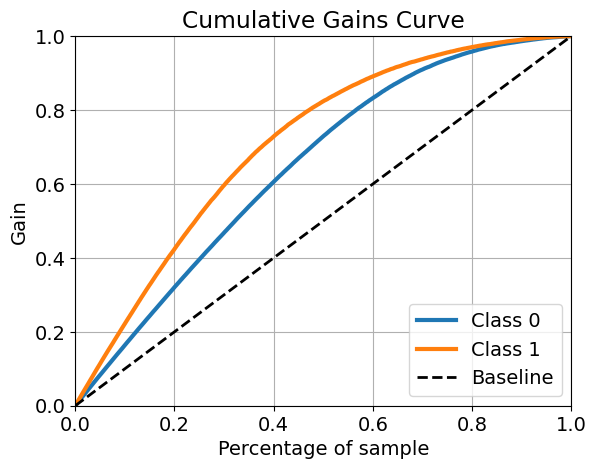

In [168]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, y_predprob)
plt.show()

In [169]:
y_predprob = rorp.predict_proba(x_test)[:, 1]

In [170]:
print(y_predprob)
print(y_pred)
# y_test.columns

[0.53 0.76 0.07 ... 0.9  0.52 0.2 ]
[1 1 0 ... 1 1 0]


In [171]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14 

Text(0, 0.5, 'frequency')

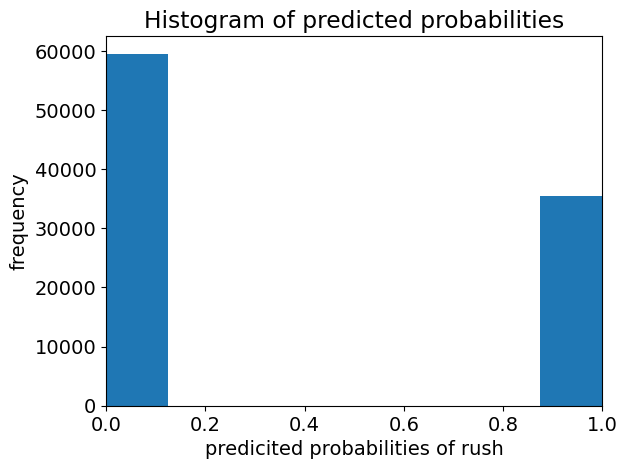

In [172]:
plt.hist(y_pred, bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('predicited probabilities of rush')
plt.ylabel('frequency') # 0 and 1 

In [201]:
y_pred= (y_predprob >= 0.5).astype(float)

In [202]:
print (metrics.accuracy_score(y_test, y_pred))

0.7903519385554211


In [174]:
y_predprob[0:10]


array([0.53, 0.76, 0.07, 1.  , 0.55, 0.48, 0.07, 0.47, 0.35, 0.65])

In [175]:
y_pred[0:10]

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [176]:
y_test.values[0:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [177]:
print (confusion)


[[47640  8025]
 [11887 27493]]


In [178]:
print (metrics.confusion_matrix(y_test, y_pred))


[[47640  8025]
 [11887 27493]]


In [179]:
print (46 / float(46 + 16))


0.7419354838709677


In [180]:
print (80 / float(80 + 50))


0.6153846153846154


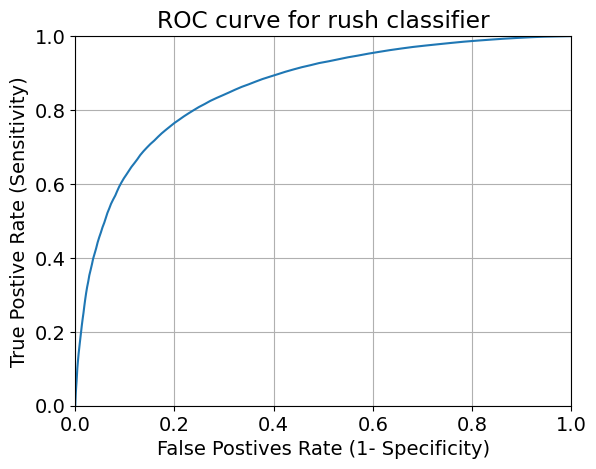

In [181]:
fpr,tpr, thresholds = metrics.roc_curve(y_test.values, y_predprob)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for rush classifier")
plt.xlabel("False Postives Rate (1- Specificity)")
plt.ylabel("True Postive Rate (Sensitivity)")
plt.grid(True) # big O notation moment 

In [182]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1- tpr[thresholds > threshold][-1])
    

In [207]:
evaluate_threshold(0.7)

Sensitivity: 0.4690959878110716
Specificity: 0.5309040121889284


In [208]:
print (metrics.accuracy_score(y_test, y_pred))

0.7903519385554211


In [184]:
evaluate_threshold(0.5)

Sensitivity: 0.6981462671406805
Specificity: 0.3018537328593195


In [185]:
for i in range(100):
    evaluate_threshold(i/100)

Sensitivity: 0.9996698831894363
Specificity: 0.00033011681056371867
Sensitivity: 0.9991366175723717
Specificity: 0.0008633824276282898
Sensitivity: 0.9984002031488065
Specificity: 0.0015997968511934912
Sensitivity: 0.997054342305739
Specificity: 0.002945657694261028
Sensitivity: 0.9951498222447943
Specificity: 0.004850177755205687
Sensitivity: 0.9930421533773489
Specificity: 0.006957846622651087
Sensitivity: 0.9905027932960894
Specificity: 0.009497206703910632
Sensitivity: 0.9877856780091417
Specificity: 0.012214321990858257
Sensitivity: 0.984941594718131
Specificity: 0.01505840528186897
Sensitivity: 0.9814372778059929
Specificity: 0.01856272219400712
Sensitivity: 0.9779837480954799
Specificity: 0.022016251904520057
Sensitivity: 0.9743778567800914
Specificity: 0.025622143219908633
Sensitivity: 0.9706957846622651
Specificity: 0.029304215337734862
Sensitivity: 0.9665058405281869
Specificity: 0.03349415947181311
Sensitivity: 0.9620873539867953
Specificity: 0.037912646013204654
Sensitivity

In [186]:
# import numpy as np
# from sklearn.metrics import f1_score

# y_probs = rorp.predict_proba(x_test)[:, 1]

# thresholds = np.arange(0, 1.05, 0.05)
# best_threshold = 0.5
# best_f1 = 0

# for threshold in thresholds:
#     y_pred = (y_probs >= threshold).astype(int)
#     f1 = f1_score(y_test, y_pred)
#     if f1 > best_f1:
#         best_f1 = f1
#         best_threshold = threshold

# print("Best Threshold:", best_threshold)

In [187]:
print(y_predprob)

[0.53 0.76 0.07 ... 0.9  0.52 0.2 ]


In [188]:
print(y_pred)

[1 1 0 ... 1 1 0]


In [189]:
metrics.roc_auc_score(y_test, y_predprob)

0.8592156682417407

In [190]:
#from sklearn.model_selection import cross_val_score
#roc_auc_mean = cross_val_score(rorp, x_train, y_train, cv=10, scoring='roc_auc').mean()


In [191]:
feature_importances = rorp.feature_importances_
feature_importance_df = pd.DataFrame(
    {"Feature": feature_set, "Importance": feature_importances}
)
print(feature_importance_df.sort_values(['Importance'], ascending=False))

                      Feature  Importance
8                         epa    0.129935
13                    shotgun    0.116893
9                         wpa    0.094646
11     half_seconds_remaining    0.062269
10               yardline_100    0.061183
7      game_seconds_remaining    0.053667
1   quarter_seconds_remaining    0.051703
17                 time_score    0.051557
3                     yrdln_f    0.051347
5     score_differential_post    0.051303
6                   defteam_f    0.040909
16           posteam_rp_ratio    0.038447
2                     ydstogo    0.035110
14                      drive    0.034245
12            side_of_field_f    0.034098
0                   posteam_f    0.034026
15               down_ydstogo    0.031267
4                        down    0.027393
